# Kümes Hayvanları Üretimi Analizi

Bu proje için ilgili TÜİK verilerinden yararlanılmıştır. 

* ty : tavuk yumurtası sayısı (bin adet)
* ty_toplam : senelik toplam tavuk yumurtası sayısı(bin adet)
* hindi_kulucka : hindi civcivi üretimi için kuluçkaya basılan yumurta sayısı (bin adet)
* hindi_kulucka_toplam : senelik toplam hindi civcivi üretimi için kuluçkaya basılan yumurta sayısı(bin adet)
* üh : üretilen hindi civcivi sayısı (bin adet)
* üh_toplam : senelik toplam üretilen hindi civcivi sayısı(bin adet)
* kt : kesilen tavuk sayısı (bin adet)
* kt_toplam : senelik toplam kesilen tavuk sayısı (bin adet)
* te : elde edilen tavuk eti miktarı (ton)
* te_toplam : senelik toplam elde edilen tavuk eti miktarı (ton)
* tavuk_kulucka : tavuk civcivi üretimi için kuluçkaya basılan yumurta sayısı (bin adet)
* tavuk_kulucka_toplam : senelik toplam tavuk civcivi üretimi için kuluçkaya basılan yumurta sayısı (bin adet)
* üt : üretilen tavuk civcivi sayısı (bin adet)
* üt_toplam : senelik toplam üretilen tavuk civcivi sayısı (bin adet)
* kh : kesilen hindi sayısı (bin adet)
* kh_toplam : senelik toplam kesilen hindi sayısı (bin adet)
* he : elde edilen hindi eti miktarı (ton)
* he_toplam : senelik elde edilen hindi eti miktarı (ton)

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

data = pd.read_excel("kümeshayvanlari.xlsx")
data.head()

,Sene,ty_ocak,ty_subat,ty_mart,ty_nisan,ty_mayis,ty_haziran,ty_temmuz,ty_agustos,ty_eylul,...,he_nisan,he_mayis,he_haziran,he_temmuz,he_agustos,he_eylul,he_ekim,he_kasim,he_aralik,he_toplam
0,2010,965383,907046,960178,936929,945111,926769,962701,993540,1017014,...,0,0,0,0,0,0,0,0,0,0
1,2011,1100827,1048171,1106555,1044659,1044963,1021721,1046113,1074201,1090565,...,0,0,0,0,0,0,0,0,0,0
2,2012,1197043,1152131,1235833,1197651,1194883,1198666,1222905,1258762,1277839,...,2759,3683,3839,3837,3550,4034,3154,3542,4662,41930
3,2013,1390977,1284656,1358139,1349251,1356668,1326064,1335298,1396547,1386251,...,2639,3193,3359,3723,3527,3373,3424,3570,5034,39628
4,2014,1462302,1397231,1461801,1417080,1394656,1350042,1349863,1433816,1442286,...,3465,4061,4538,3819,4491,4596,3989,3649,5936,48663


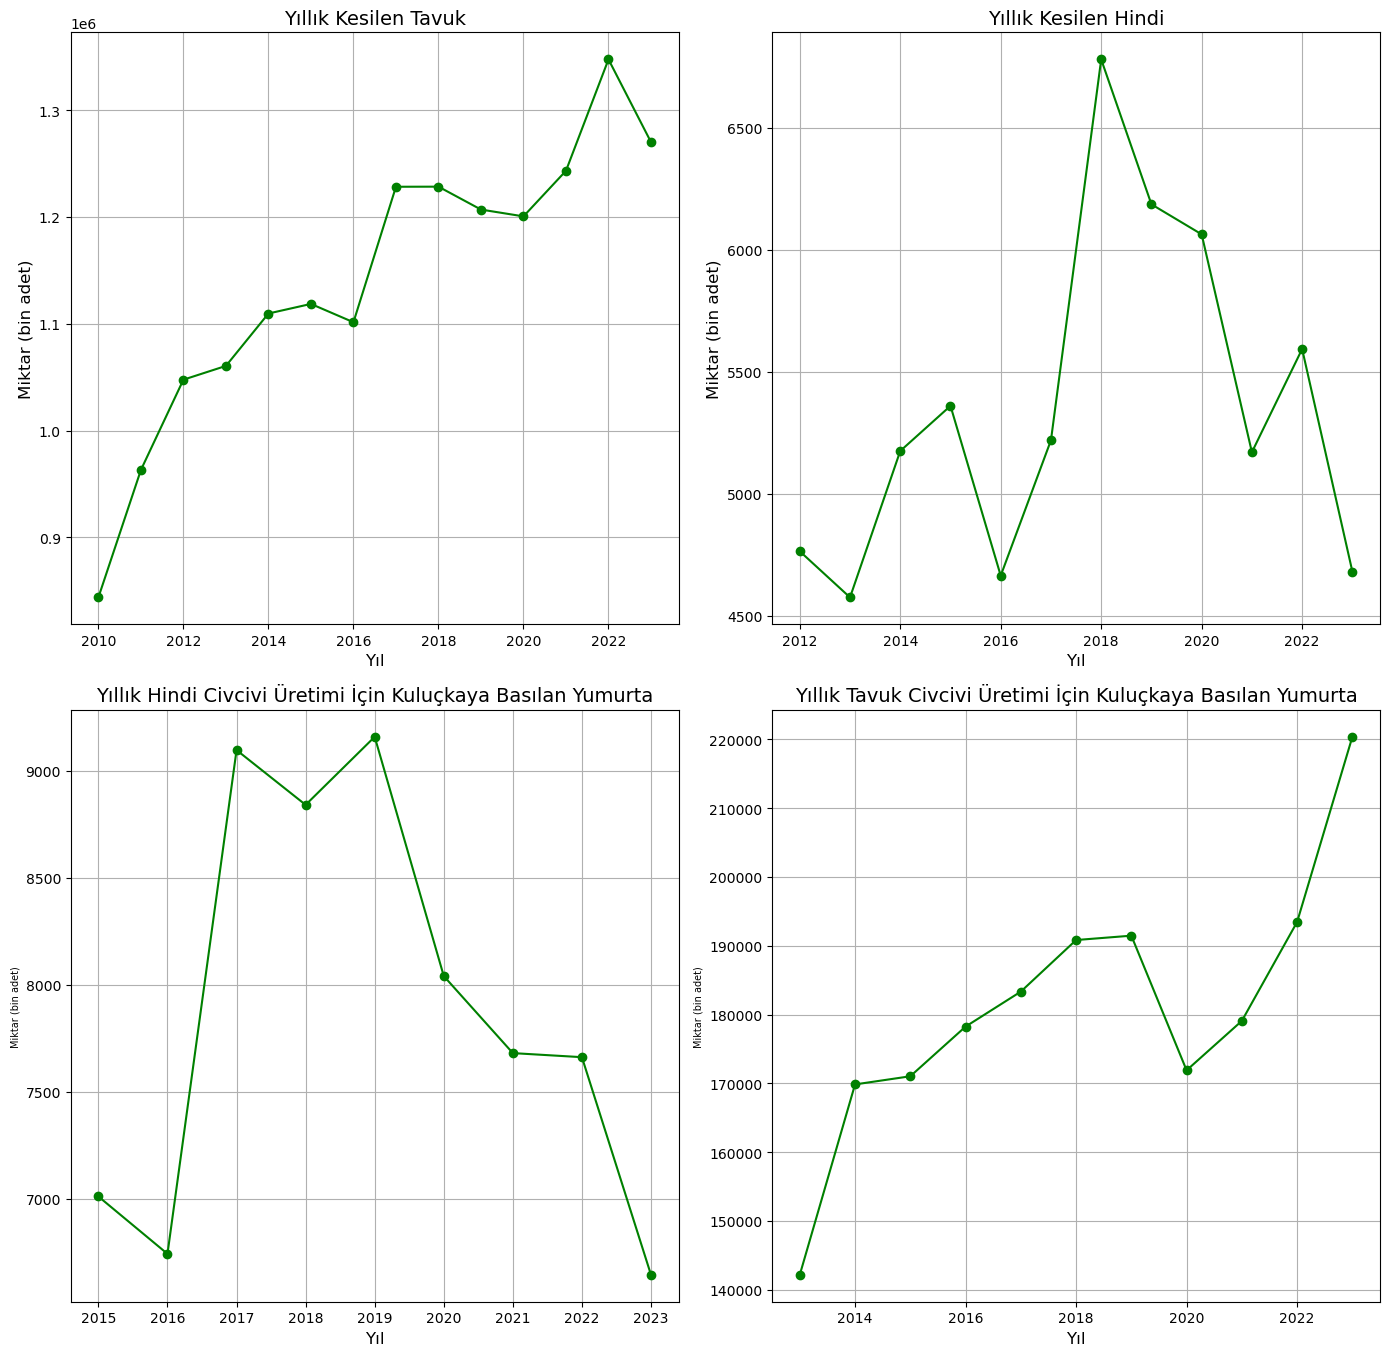

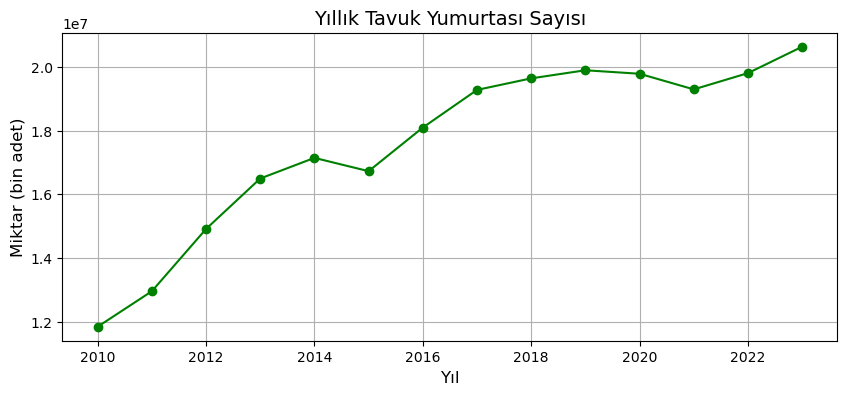

In [46]:
ty_total_data = data[['Sene', 'ty_toplam']]
kt_total = data[['Sene', 'kt_toplam']]
kh_total = data[['Sene', 'kh_toplam']]
hindi_kulucka_total = data[['Sene', 'hindi_kulucka_toplam']]
tavuk_kulucka_total = data[['Sene', 'tavuk_kulucka_toplam']]

# Değeri "0" olan satırların filtrelenmesi
kt_filtered = kt_total[kt_total['kt_toplam'] != 0]
kh_filtered = kh_total[kh_total['kh_toplam'] != 0]
hindi_kulucka_filtered = hindi_kulucka_total[hindi_kulucka_total['hindi_kulucka_toplam'] != 0]
tavuk_kulucka_filtered = tavuk_kulucka_total[tavuk_kulucka_total['tavuk_kulucka_toplam'] != 0]

plt.figure(figsize=(14, 20))
# 'kt_toplam' grafiğinin çizdirilmesi
plt.subplot(3, 2, 1)
plt.plot(kt_filtered['Sene'], kt_filtered['kt_toplam'], marker='o', color='green')
plt.title('Yıllık Kesilen Tavuk', fontsize=14)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Miktar (bin adet)', fontsize=12)
plt.grid(True)

# 'kh_toplam' grafiğinin çizdirilmesi
plt.subplot(3, 2, 2)
plt.plot(kh_filtered['Sene'], kh_filtered['kh_toplam'], marker='o', color='green')
plt.title('Yıllık Kesilen Hindi', fontsize=14)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Miktar (bin adet)', fontsize=12)
plt.grid(True)

# 'hindi_kulucka_toplam' grafiğinin çizdirilmesi
plt.subplot(3, 2, 3)
plt.plot(hindi_kulucka_filtered['Sene'], hindi_kulucka_filtered['hindi_kulucka_toplam'], marker='o', color='green')
plt.title('Yıllık Hindi Civcivi Üretimi İçin Kuluçkaya Basılan Yumurta', fontsize=14)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Miktar (bin adet)', fontsize=7)
plt.grid(True)

# 'tavuk_kulucka_toplam' grafiğinin çizdirilmesi
plt.subplot(3, 2, 4)
plt.plot(tavuk_kulucka_filtered['Sene'], tavuk_kulucka_filtered['tavuk_kulucka_toplam'], marker='o', color='green')
plt.title('Yıllık Tavuk Civcivi Üretimi İçin Kuluçkaya Basılan Yumurta', fontsize=14)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Miktar (bin adet)', fontsize=7)
plt.grid(True)

plt.tight_layout()
plt.show()

# 'ty_toplam' grafiğinin çizdirilmesi
plt.figure(figsize=(10, 4))
plt.plot(ty_total_data['Sene'], ty_total_data['ty_toplam'], marker='o', color='green')
plt.title('Yıllık Tavuk Yumurtası Sayısı', fontsize=14)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Miktar (bin adet)', fontsize=12)
plt.grid(True)
plt.show()

* Yukarıdaki grafikler kt, kh, hindi_kulucka, tavuk_kulucka ve yt değişkenlerinin yıllara göre değişimini içermektedir.

# Artış Oranları

In [50]:
tavuk_kulucka_data = data[['Sene', 'tavuk_kulucka_toplam']]

# Değeri "0" olan satırların filtrelenmesi
tavuk_kulucka_data = tavuk_kulucka_data[tavuk_kulucka_data['tavuk_kulucka_toplam'] != 0]

# Oranların hesaplanması
tavuk_kulucka_data['artış_oranı'] = tavuk_kulucka_data['tavuk_kulucka_toplam'].pct_change() * 100

print(tavuk_kulucka_data[['Sene', 'tavuk_kulucka_toplam', 'artış_oranı']])

    Sene  tavuk_kulucka_toplam  artış_oranı
3   2013                142199          NaN
4   2014                169864    19.455130
5   2015                171047     0.696440
6   2016                178261     4.217554
7   2017                183345     2.851998
8   2018                190840     4.087922
9   2019                191474     0.332215
10  2020                171913   -10.216008
11  2021                179092     4.175949
12  2022                193464     8.024926
13  2023                220368    13.906463


* Yukarıdaki değerler tavuk civcivi üretimi için kuluçkaya basılan yumurta sayısının bir önceki yıla göre artış/azalış oranını göstermektedir.

In [53]:
civciv_production_data = data[['Sene', 'üt_toplam']]

# Değeri "0" olan satırların filtrelenmesi
civciv_production_data = civciv_production_data[civciv_production_data['üt_toplam'] != 0]

# Oranların hesaplanması
civciv_production_data['artış_oranı'] = civciv_production_data['üt_toplam'].pct_change() * 100

print(civciv_production_data[['Sene', 'üt_toplam', 'artış_oranı']])

    Sene  üt_toplam  artış_oranı
3   2013      52333          NaN
4   2014      62148    18.754897
5   2015      61820    -0.527772
6   2016      65051     5.226464
7   2017      68706     5.618668
8   2018      70303     2.324397
9   2019      70266    -0.052629
10  2020      64452    -8.274272
11  2021      66428     3.065847
12  2022      70940     6.792316
13  2023      74684     5.277699


* Yukarıdaki değerler senelik toplam üretilen tavuk civcivi sayısının bir önceki yıla göre artış/azalış oranını göstermektedir.

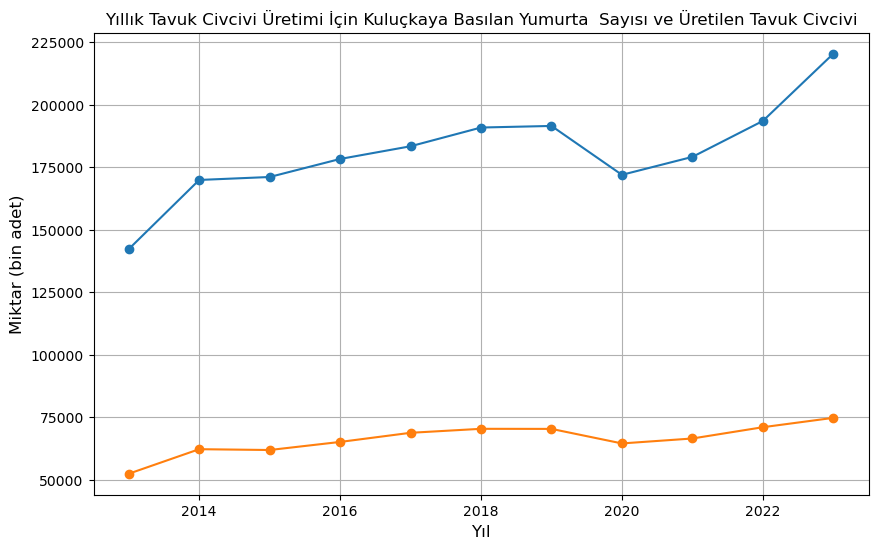

In [56]:
üt_total = data[['Sene', 'üt_toplam']]

# Değeri "0" olan satırların filtrelenmesi
üt_filtered = üt_total[üt_total['üt_toplam'] != 0]

# Grafiğin çizdirilmesi
plt.figure(figsize=(10, 6))
plt.plot(tavuk_kulucka_filtered['Sene'], tavuk_kulucka_filtered['tavuk_kulucka_toplam'], marker='o')
plt.plot(üt_filtered['Sene'], üt_filtered['üt_toplam'], marker='o')
plt.title('Yıllık Tavuk Civcivi Üretimi İçin Kuluçkaya Basılan Yumurta  Sayısı ve Üretilen Tavuk Civcivi', fontsize=12)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Miktar (bin adet)', fontsize=12)
plt.grid(True)
plt.show()

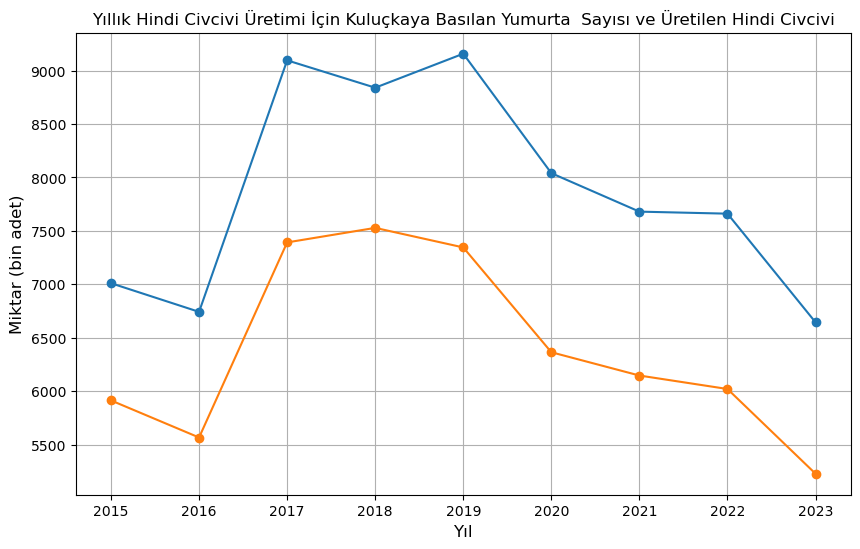

In [58]:
üh_total = data[['Sene', 'üh_toplam']]

# Değeri "0" olan satırların filtrelenmesi
üh_filtered = üh_total[üh_total['üh_toplam'] != 0]

# Grafiğin çizdirilmesi
plt.figure(figsize=(10, 6))
plt.plot(hindi_kulucka_filtered['Sene'], hindi_kulucka_filtered['hindi_kulucka_toplam'], marker='o')
plt.plot(üh_filtered['Sene'], üh_filtered['üh_toplam'], marker='o')
plt.title('Yıllık Hindi Civcivi Üretimi İçin Kuluçkaya Basılan Yumurta  Sayısı ve Üretilen Hindi Civcivi', fontsize=12)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Miktar (bin adet)', fontsize=12)
plt.grid(True)
plt.show()


# Aylık Gösterimler

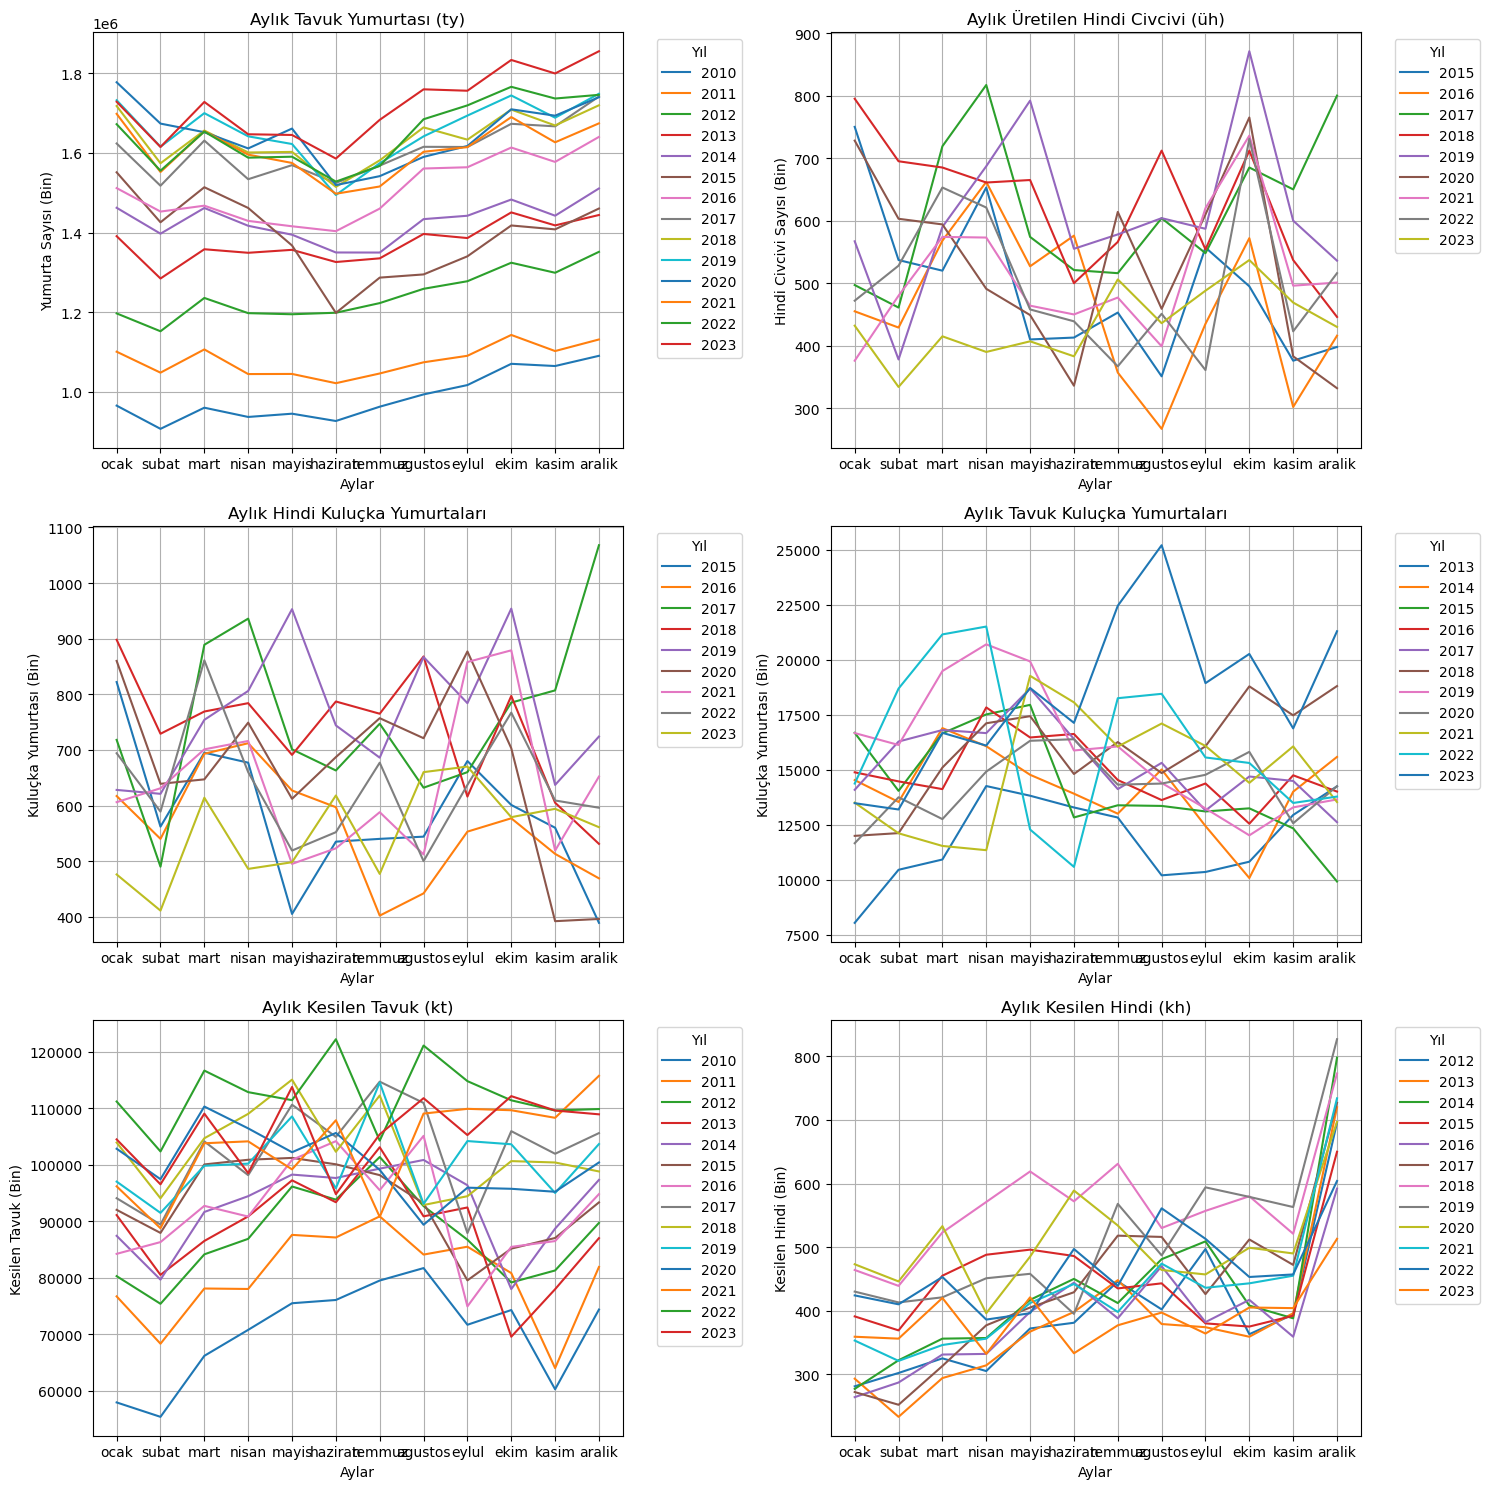

In [61]:
# Aylar ve ilgili sütunların isimleri
months = ['ocak', 'subat', 'mart', 'nisan', 'mayis', 'haziran', 'temmuz', 'agustos', 'eylul', 'ekim', 'kasim', 'aralik']
ty_columns = [f'ty_{month}' for month in months]
üh_columns = [f'üh_{month}' for month in months]
hindi_kulucka_columns = [f'hindi_kulucka_{month}' for month in months]
tavuk_kulucka_columns = [f'tavuk_kulucka_{month}' for month in months]
kt_columns = [f'kt_{month}' for month in months]
kh_columns = [f'kh_{month}' for month in months]

# "0" verilerini filtreleme fonksiyonu
def filter_zero_values(df, columns):
    return df[(df[columns] != 0).all(axis=1)]

# İlgili sütunlarda "0" olanları filtreleme
filtered_üh = filter_zero_values(data, üh_columns)
filtered_hindi_kulucka = filter_zero_values(data, hindi_kulucka_columns)
filtered_tavuk_kulucka = filter_zero_values(data, tavuk_kulucka_columns)
filtered_kh = filter_zero_values(data, kh_columns)

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# 'ty' için grafik
for index, row in data.iterrows():
    axes[0, 0].plot(months, row[ty_columns], label=f"{row['Sene']}")
axes[0, 0].set_title('Aylık Tavuk Yumurtası (ty)')
axes[0, 0].set_xlabel('Aylar')
axes[0, 0].set_ylabel('Yumurta Sayısı (Bin)')
axes[0, 0].legend(title='Yıl', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 0].grid(True)

# 'üh' için grafik
for index, row in filtered_üh.iterrows():
    axes[0, 1].plot(months, row[üh_columns], label=f"{row['Sene']}")
axes[0, 1].set_title('Aylık Üretilen Hindi Civcivi (üh)')
axes[0, 1].set_xlabel('Aylar')
axes[0, 1].set_ylabel('Hindi Civcivi Sayısı (Bin)')
axes[0, 1].legend(title='Yıl', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 1].grid(True)

# 'hindi_kulucka' için grafik
for index, row in filtered_hindi_kulucka.iterrows():
    axes[1, 0].plot(months, row[hindi_kulucka_columns], label=f"{row['Sene']}")
axes[1, 0].set_title('Aylık Hindi Kuluçka Yumurtaları')
axes[1, 0].set_xlabel('Aylar')
axes[1, 0].set_ylabel('Kuluçka Yumurtası (Bin)')
axes[1, 0].legend(title='Yıl', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 0].grid(True)

# 'tavuk_kulucka' için grafik
for index, row in filtered_tavuk_kulucka.iterrows():
    axes[1, 1].plot(months, row[tavuk_kulucka_columns], label=f"{row['Sene']}")
axes[1, 1].set_title('Aylık Tavuk Kuluçka Yumurtaları')
axes[1, 1].set_xlabel('Aylar')
axes[1, 1].set_ylabel('Kuluçka Yumurtası (Bin)')
axes[1, 1].legend(title='Yıl', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].grid(True)

# 'kt' için grafik
for index, row in data.iterrows():
    axes[2, 0].plot(months, row[kt_columns], label=f"{row['Sene']}")
axes[2, 0].set_title('Aylık Kesilen Tavuk (kt)')
axes[2, 0].set_xlabel('Aylar')
axes[2, 0].set_ylabel('Kesilen Tavuk (Bin)')
axes[2, 0].legend(title='Yıl', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2, 0].grid(True)

# 'kh' için grafik
for index, row in filtered_kh.iterrows():
    axes[2, 1].plot(months, row[kh_columns], label=f"{row['Sene']}")
axes[2, 1].set_title('Aylık Kesilen Hindi (kh)')
axes[2, 1].set_xlabel('Aylar')
axes[2, 1].set_ylabel('Kesilen Hindi (Bin)')
axes[2, 1].legend(title='Yıl', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2, 1].grid(True)

plt.tight_layout()
plt.show()

* Aylık veriler dikkate alındığında, her sene için kesilen hindi sayısının kasım-aralık ayları arasında büyük bir artış gösterdiği net bir şekilde görülmektedir. 

# Mevsimsellik Analizi

C:\Users\emirc\AppData\Local\Temp\ipykernel_6228\3266553741.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  kt_monthly_data['Date'] = pd.date_range(start=f'{data["Sene"].min()}-01', periods=len(kt_monthly_data), freq='M')


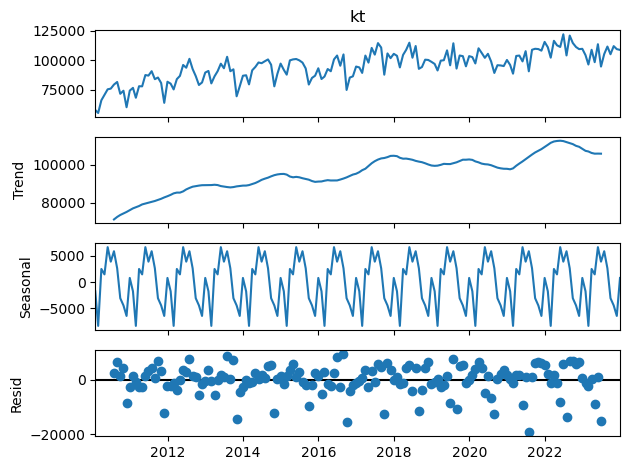

In [65]:
months = ['ocak', 'subat', 'mart', 'nisan', 'mayis', 'haziran', 'temmuz', 'agustos', 'eylul', 'ekim', 'kasim', 'aralik']
kt_columns = [f'kt_{month}' for month in months]

kt_monthly_data = data[kt_columns].stack().reset_index(level=1)
kt_monthly_data.columns = ['Month', 'kt']

kt_monthly_data['Date'] = pd.date_range(start=f'{data["Sene"].min()}-01', periods=len(kt_monthly_data), freq='M')

# Zaman serisi
kt_monthly_data.set_index('Date', inplace=True)

# Mevsimsel ayrıştırma
result = seasonal_decompose(kt_monthly_data['kt'], model='additive', period=12)

result.plot()
plt.show()


* Grafiklere bakıldığı zaman, kesilen tavuk sayısının(kt) yükselen bir trend gösterdiği yani kesilen tavuk sayısının her yıl düzenli olarak artıyor olduğu görülmektedir.
* Oluşan mevsimsel desenden, kesilen tavuk sayısının her sene yaz aylarında artış gösterdiği görülmektedir.

# SARIMA Modelinin Uygulanması

C:\Users\emirc\AppData\Local\Temp\ipykernel_6228\4222353977.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  kt_monthly['Date'] = pd.date_range(start=f'{data["Sene"].min()}-01', periods=len(kt_monthly), freq='M')
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\emirc\AppData\Local\Temp\ipykernel_6228\4222353977.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=kt_monthly.index[-1], periods=12, freq='M')


Tahmin - 2023-12: 107863.82 bin adet kesilen tavuk
Tahmin - 2024-01: 100321.50 bin adet kesilen tavuk
Tahmin - 2024-02: 111967.22 bin adet kesilen tavuk
Tahmin - 2024-03: 105188.67 bin adet kesilen tavuk
Tahmin - 2024-04: 116387.04 bin adet kesilen tavuk
Tahmin - 2024-05: 103909.02 bin adet kesilen tavuk
Tahmin - 2024-06: 110888.45 bin adet kesilen tavuk
Tahmin - 2024-07: 114213.85 bin adet kesilen tavuk
Tahmin - 2024-08: 108382.59 bin adet kesilen tavuk
Tahmin - 2024-09: 112609.35 bin adet kesilen tavuk
Tahmin - 2024-10: 110183.65 bin adet kesilen tavuk
Tahmin - 2024-11: 112654.65 bin adet kesilen tavuk


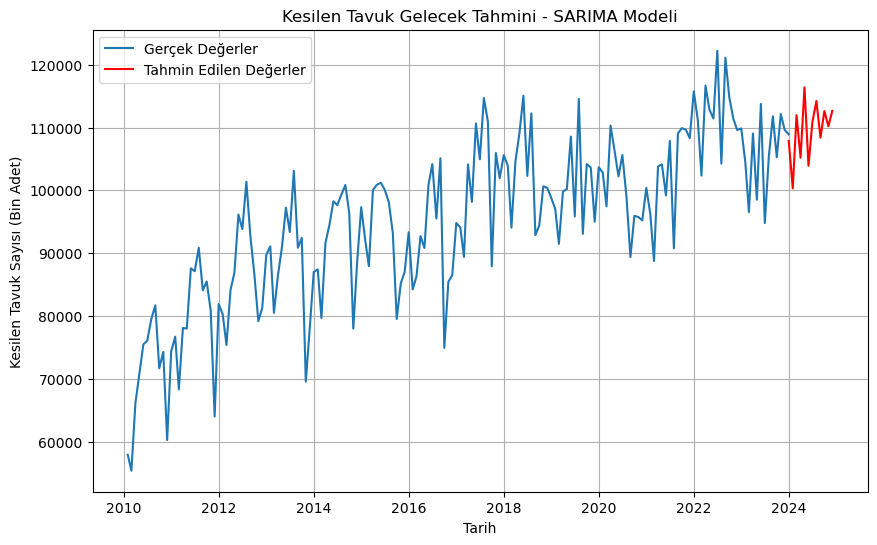

In [69]:
months = ['ocak', 'subat', 'mart', 'nisan', 'mayis', 'haziran', 'temmuz', 'agustos', 'eylul', 'ekim', 'kasim', 'aralik']
kt_columns = [f'kt_{month}' for month in months]

kt_monthly = data[kt_columns].stack().reset_index(level=1)
kt_monthly.columns = ['Month', 'Kesilen_Tavuk']

kt_monthly['Date'] = pd.date_range(start=f'{data["Sene"].min()}-01', periods=len(kt_monthly), freq='M')

kt_monthly.set_index('Date', inplace=True)

# SARIMA Modelinin Tanımlanması
model = SARIMAX(kt_monthly['Kesilen_Tavuk'], 
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12))

# Modeli eğitme
model_fit = model.fit()

# 2024 yılı için 12 ay tahmin yapma
forecast = model_fit.forecast(steps=12)

# Tahmin edilen değerleri gösterme
forecast_dates = pd.date_range(start=kt_monthly.index[-1], periods=12, freq='M')
for date, value in zip(forecast_dates, forecast):
    print(f'Tahmin - {date.strftime("%Y-%m")}: {value:.2f} bin adet kesilen tavuk')

# Tahminleri ve gerçek değerleri görselleştirme
plt.figure(figsize=(10,6))
plt.plot(kt_monthly.index, kt_monthly['Kesilen_Tavuk'], label='Gerçek Değerler')
plt.plot(forecast_dates, forecast, label='Tahmin Edilen Değerler', color='red')
plt.title('Kesilen Tavuk Gelecek Tahmini - SARIMA Modeli')
plt.xlabel('Tarih')
plt.ylabel('Kesilen Tavuk Sayısı (Bin Adet)')
plt.legend()
plt.grid(True)
plt.show()